# var

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [1]:
import jovian

In [1]:
# Execute this to save new versions of the notebook
jovian.commit(project="var")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kaustavsen16/var" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kaustavsen16/var


'https://jovian.ai/kaustavsen16/var'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas import DataFrame
import pathlib
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.api import VAR, VECM
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [4]:
labshare = pd.read_csv('labshare.csv')
labshare

,LAB_SHARE,inv_share,log_gdp_capita,Foreign,TOP ONE,social exp,credit
0,38.500,3.025565,9.949954,0.042485,0.0734,6755,8504.00
1,37.800,2.910870,9.985044,0.047506,0.0670,7656,10676.00
2,38.500,2.906384,9.995924,0.035912,0.0611,9352,12322.00
3,38.400,2.901579,10.043075,0.002584,0.1031,10788,14899.00
4,39.600,2.913217,10.057612,0.009069,0.0889,12418,18409.00
5,39.700,2.938682,10.086223,0.045628,0.1045,17031,21566.00
6,40.600,2.927267,10.110673,0.047284,0.1081,19609,25050.00
7,41.300,3.012120,10.127722,0.076091,0.1032,22551,29070.00
8,39.800,3.036231,10.198175,0.030766,0.1111,25998,34219.00
9,39.900,3.056615,10.234838,0.085157,0.1102,29059,40383.00


exog_df = pd.read_csv('exog.csv')
exog_df

In [4]:
dataind_seasadj_endog_df.describe()

,cpi,reer,wacr,asset,gscpi,iip,wage,repo,food,reer_cf_cycle,wage mom,cf_cycle,inf exp
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,5.935824,97.753871,6.120992,32945.767242,0.452097,119.534677,257.310841,6.221371,105.718548,-0.240967,2.402726,0.005569,10.269259
std,2.445738,4.916734,1.753201,11545.208018,1.305997,13.426869,48.401044,1.396543,14.190902,2.447181,17.499088,6.358636,1.432698
min,1.460000,84.130000,3.135995,16396.230910,-0.960000,54.000000,153.962857,4.000000,89.000000,-6.286745,-43.472951,-33.447346,7.502723
25%,4.192500,94.492500,5.025760,25604.007465,-0.490000,110.275000,226.877500,5.150000,95.975000,-1.012327,-8.099923,-1.249621,9.022192
50%,5.405000,99.105000,6.228478,30693.037575,0.020000,119.500000,262.485000,6.250000,101.500000,0.337218,2.979864,-0.049674,10.119335
75%,7.440000,101.302500,7.710454,38427.882953,0.625000,129.350000,289.220000,7.500000,111.625000,1.198930,12.806254,1.356330,11.521020
max,11.726147,104.590000,9.971509,60421.924000,4.320000,148.800000,340.500000,8.000000,156.300000,4.201698,51.637702,17.551810,13.060300


In [14]:
labshare.index = pd.date_range(start='1980', end='2018', freq='12MS')

In [7]:
dataind_seasadj_endog_df2=dataind_seasadj_endog_df.drop(['cpi','reer', 'repo', 'asset','wage'], axis=1)

In [33]:
dataind_seasadj_endog_df2=dataind_seasadj_endog_df2.drop(['Time','cf_cycle','food growth','exp','oil growth','reer_cycle','D_gscpi','gscpi', 'wagemom'], axis=1)

In [54]:
exog_df=exog_df.drop(['D_exp'], axis=1)

exog_df

In [10]:
dataind_seasadj_endog_df2['D_exp']=dataind_seasadj_endog_df2['exp'].diff(1)

In [31]:
dataind_seasadj_endog_df2['food growthL5']=dataind_seasadj_endog_df2['food growth'].shift(5)

dataind_seasadj_endog_df2

dataind_seasadj_endog_df2

In [33]:
adftest = adfuller(dataind_seasadj_endog_df['cpi'].dropna(),autolag="AIC")
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])

ADF Statistic: -2.113645
p-value: 0.239064


In [32]:
kpsstest = kpss(dataind_seasadj_endog_df['cpi'], regression="c", nlags="auto")
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])

KPSS Statistic: 0.683253
p-value: 0.015068


In [37]:
dataind_seasadj_endog_dfrow=dataind_seasadj_endog_df.drop(['2012-04-01','2012-05-01','2012-06-01','2012-07-01','2012-08-01'], axis=0, inplace=True)
dataind_seasadj_endog_dfrow

In [56]:
mod_ar2 = sm.tsa.SARIMAX(dataind_seasadj_endog_df['cpi'],dataind_seasadj_endog_df2.dropna(), order=(1,1,0))

res_ar2 = mod_ar2.fit()

print(res_ar2.summary())

In [59]:
forecast=res_ar2.forecast(steps=14,exog=exog_df)
forecast1=res_ar2.get_forecast(steps=14,exog=exog_df)
forecast2_ci = forecast1.conf_int()

In [60]:
forecast

2021-06-01    5.856800
2021-07-01    4.554265
2021-08-01    7.110840
2021-09-01    5.645727
2021-10-01    5.879514
2021-11-01    6.163223
2021-12-01    6.105265
2022-01-01    6.175729
2022-02-01    6.252896
2022-03-01    6.272847
2022-04-01    6.259494
2022-05-01    6.216751
2022-06-01    6.166028
2022-07-01    6.133079
Freq: MS, Name: predicted_mean, dtype: float64

In [61]:
forecast2_ci

,lower cpi,upper cpi
2021-06-01,3.947362,7.766239
2021-07-01,1.938486,7.170045
2021-08-01,3.938081,10.283599
2021-09-01,2.000356,9.291098
2021-10-01,1.816120,9.942907
2021-11-01,1.720972,10.605475
2021-12-01,1.314019,10.896510
2022-01-01,1.059239,11.292219
2022-02-01,0.830636,11.675155
2022-03-01,0.561163,11.984531


with expectation

In [40]:
print(res_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                  105
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -140.977
Date:                Sun, 13 Nov 2022   AIC                            311.954
Time:                        21:28:10   BIC                            351.620
Sample:                    09-01-2012   HQIC                           328.024
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
D_exp             0.9491      0.553      1.716      0.086      -0.135       2.033
reer_cycleL1     -0.0840      0.308     -0.273      0.785      -0.687       0.519
D_gscpiL3         0.0317      0.384     

with expectation forecast

In [49]:
forecast=res_ar2.forecast(steps=14,exog=exog_df)
forecast1=res_ar2.get_forecast(steps=14,exog=exog_df)
forecast2_ci = forecast1.conf_int()

In [50]:
forecast

2021-06-01    16.484967
2021-07-01    16.030945
2021-08-01    16.859067
2021-09-01    16.573104
2021-10-01    16.723222
2021-11-01    17.129696
2021-12-01    16.738096
2022-01-01    16.330162
2022-02-01    16.272471
2022-03-01    16.430069
2022-04-01    16.627241
2022-05-01    16.710550
2022-06-01    16.541550
2022-07-01    15.987939
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
forecast2_ci

,lower cpi,upper cpi
2021-06-01,14.639027,18.330907
2021-07-01,13.542273,18.519617
2021-08-01,13.853022,19.865111
2021-09-01,13.127287,20.018921
2021-10-01,12.887661,20.558783
2021-11-01,12.940502,21.318891
2021-12-01,12.222880,21.253312
2022-01-01,11.510930,21.149394
2022-02-01,11.167295,21.377648
2022-03-01,11.054136,21.806002


<AxesSubplot:>

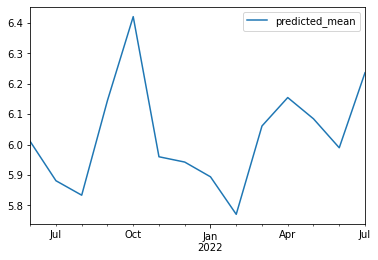

In [78]:
forecast.plot(legend = True)

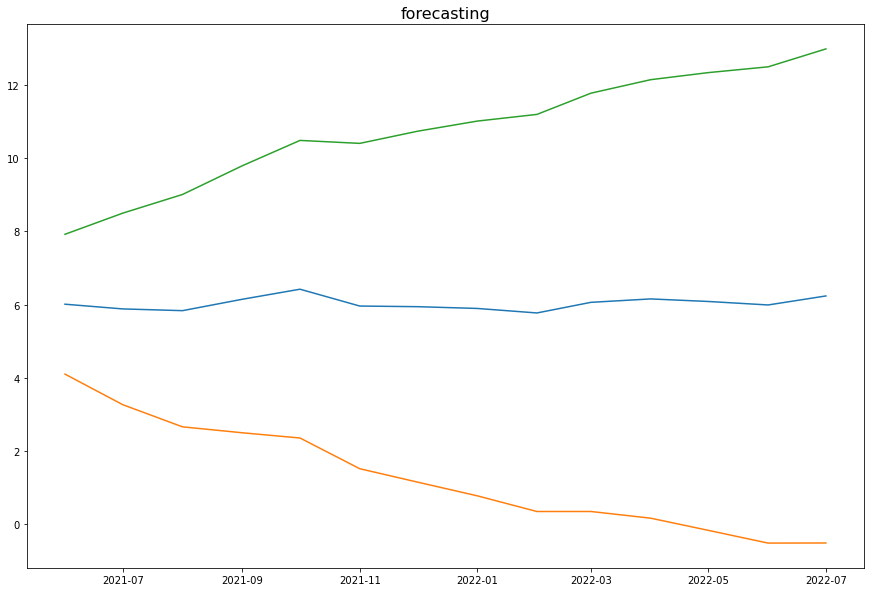

In [81]:
plt.figure(figsize=(15,10))
plt.title('forecasting', size = 16)
plt.plot(forecast, label='forecast')
plt.plot(forecast2_ci, label='forecastci')


In [18]:
model = VAR(labshare)
results = model.fit(maxlags=3, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Dec, 2022
Time:                     20:05:50
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    24.8710
Nobs:                     36.0000    HQIC:                   20.4613
Log likelihood:          -529.319    FPE:                2.91689e+08
AIC:                      18.0971    Det(Omega_mle):     1.03524e+07
--------------------------------------------------------------------
Results for equation LAB_SHARE
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    46.815243        60.039922            0.780           0.436
L1.LAB_SHARE              0.885280         0.257285            3.441           0.001
L1.inv_share              4.207593      

In [19]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')
 

In [20]:
# Model 3 (2 lag-difference used = 3 lags VAR or VAR(3) model)
# with constant/trend (deterministc) term
joh_model3 = coint_johansen(labshare,0,2) # k_ar_diff +1 = K
joh_output(joh_model3)
# Model 2: with linear trend only
joh_model2 = coint_johansen(labshare,1,2) # k_ar_diff +1 = K
joh_output(joh_model2)
 
# Model 1: no constant/trend (deterministc) term
joh_model1 = coint_johansen(labshare,-1,2) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat  trace_stat
0     91.622926  218.519443
1     40.345675  126.896517
2     27.534635   86.550841
3     24.649322   59.016206
4     19.212821   34.366885
5     13.652007   15.154064
6      1.502056    1.502056 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[43.2947 46.2299 52.3069]
 [37.2786 40.0763 45.8662]
 [31.2379 33.8777 39.3693]
 [25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[120.3673 125.6185 135.9825]
 [ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]] 

   max_eig_stat  trace_stat
0     93.016346  216.879881
1     39.148546  123.863535
2     28.356518   84.714989
3     23.619858   56.358471
4     15.227760   32.738613
5     13.227314   17.510853
6      4.283539    4.283539 

Critical values(90%, 95%, 99%) of max_eig_stat
 [